In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
exp=pd.read_csv("SampleSuperstore.csv")

In [131]:
exp.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Lets drop postal code and Country because its not important

In [132]:
exp.drop(["Country","Postal Code"],axis=1,inplace=True)

Lets check for missing value

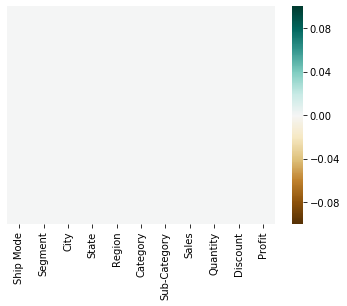

In [133]:
sns.heatmap(exp.isnull(),yticklabels=False,cbar=True,cmap="BrBG")

Great we dont have any null value

Now lets separate categorical and numerical attribute

In [134]:
num=[]
cat=[]
for i in exp.columns:
    if exp[i].dtypes=='O':
        cat.append(i)
    else:
        num.append(i)

In [135]:
num

['Sales', 'Quantity', 'Discount', 'Profit']

In [136]:
cat

['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']

# EDA on Numerical Attribute

Profit is a dependent variable and ther are independent variable

Lets check if our variable is continous numerical variable or Discrete numerical variable

we will use value_counts for that

In [137]:
for i in num:
    print(exp[i].value_counts())
    print("*"*40)

12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
376.866     1
572.800     1
3.928       1
12.032      1
629.640     1
Name: Sales, Length: 5825, dtype: int64
****************************************
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64
****************************************
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64
****************************************
 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64
****************************************


clearly we see that Quantity and discount are discrete variables

Lets see what kind of distribution each numerical variable is

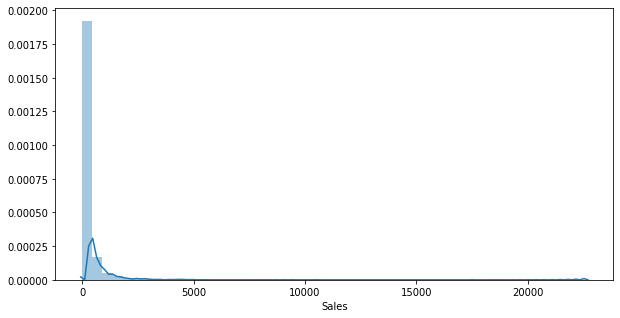

In [138]:
plt.figure(figsize=(10,5))
sns.distplot(exp["Sales"])
plt.show()

we clearly see that sales distribution is left skewed

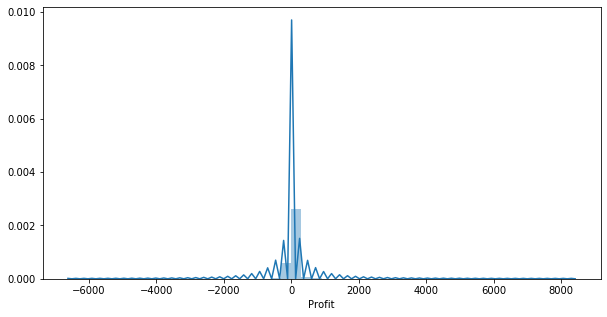

In [139]:
plt.figure(figsize=(10,5))
sns.distplot(exp["Profit"])
plt.show()

wow our profit variable is somewhat normally distributed

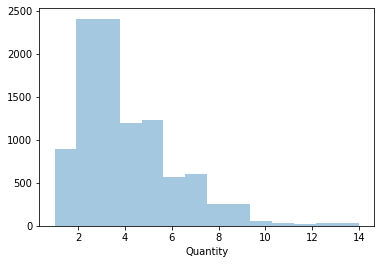

In [140]:
sns.distplot(exp["Quantity"],kde=False,bins=14)

we clearly see that our quantity left skewed

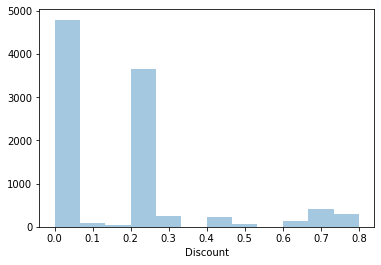

In [141]:
sns.distplot(exp["Discount"],kde=False,bins=12)

Now lets draw pairplot to see the connections between different variables

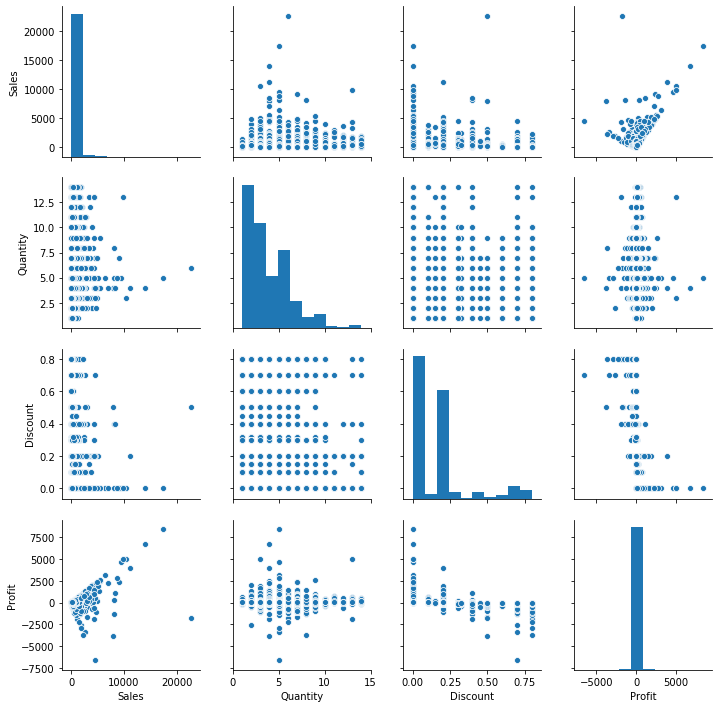

In [142]:
sns.pairplot(exp)

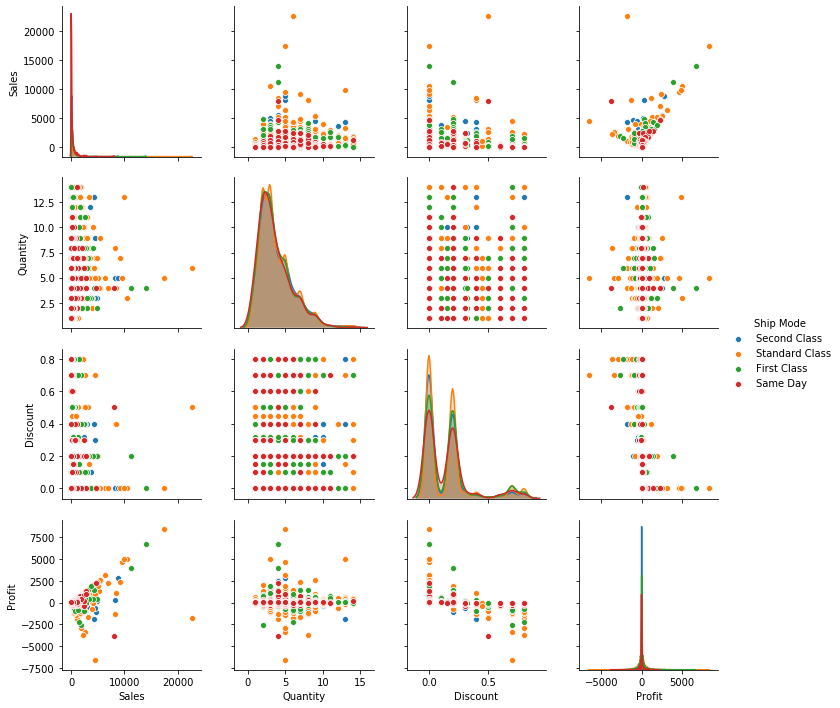

In [143]:
sns.pairplot(exp,hue="Ship Mode")

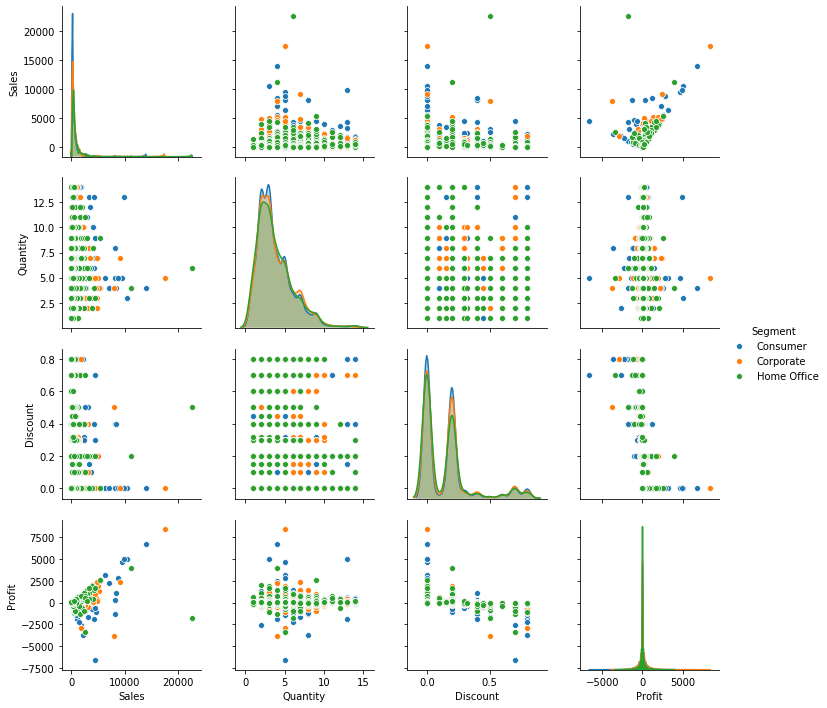

In [144]:
sns.pairplot(exp,hue="Segment")

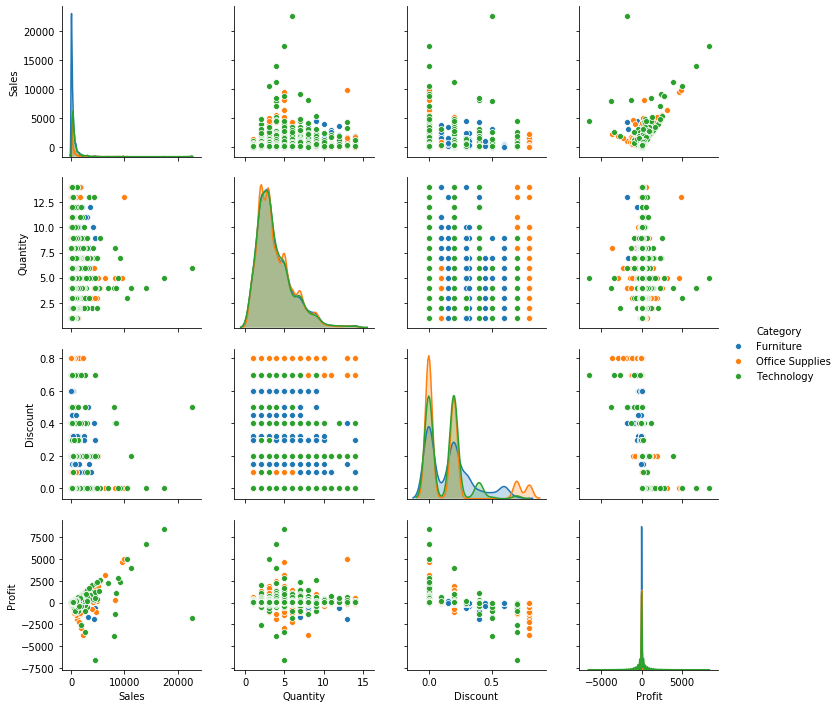

In [145]:
sns.pairplot(exp,hue="Category")

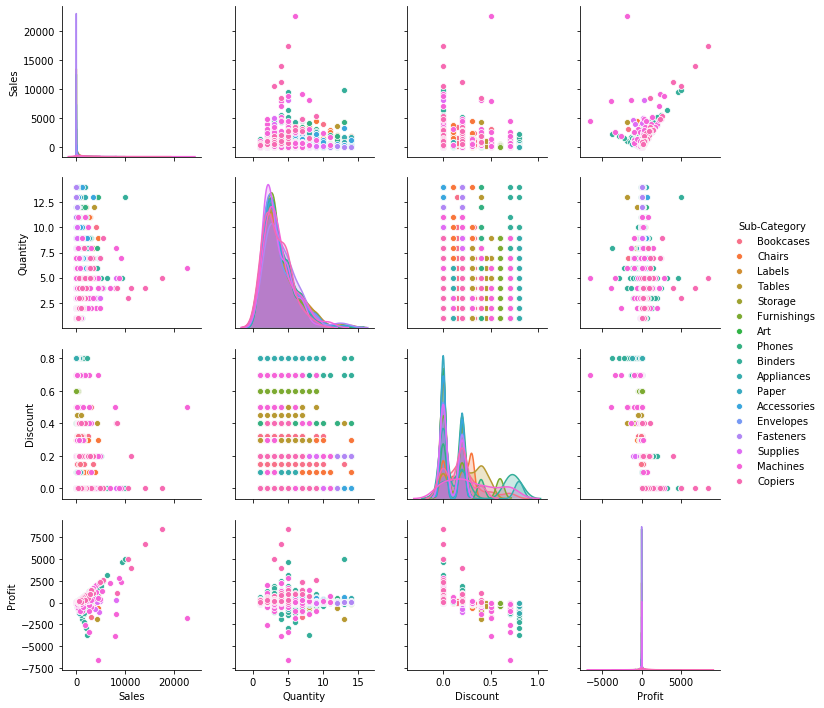

In [146]:
sns.pairplot(exp,hue="Sub-Category")

Now we are gonna use correlation to see how much these variables are correlated

In [147]:
exp.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


clearly Sales and Profit are directly correlated

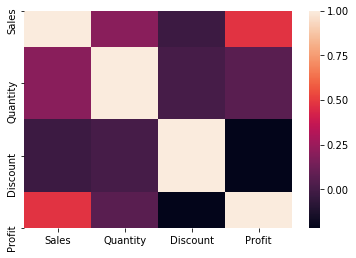

In [148]:
sns.heatmap(exp.corr())

# EDA on Categorical Attribute

In [149]:
cat

['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']

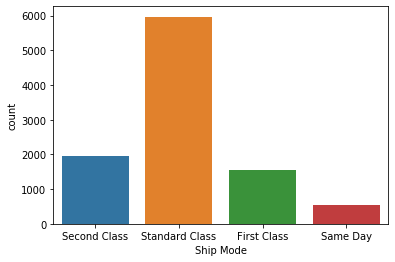

In [150]:
sns.countplot("Ship Mode",data=exp)

clearly our dataset contains high number of standard class people

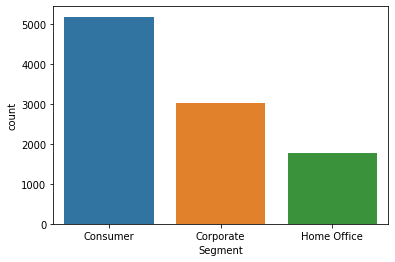

In [151]:
sns.countplot("Segment",data=exp)

clearly the consumer quantity is highest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

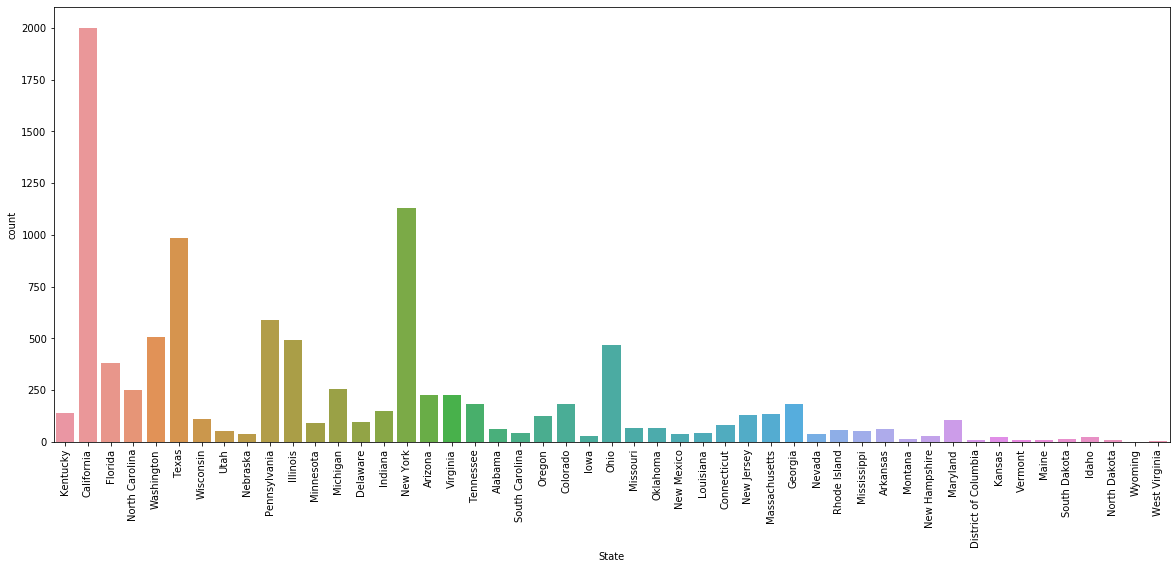

In [152]:
plt.figure(figsize=(20,8))
sns.countplot("State",data=exp)
plt.xticks(rotation=90)

Clearly most number of company buisness is in california

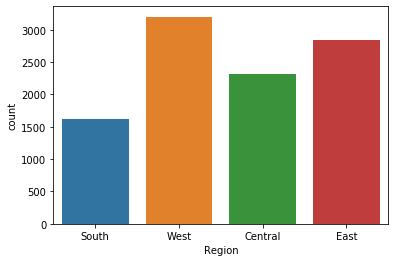

In [153]:
sns.countplot("Region",data=exp)

clearly most of the people are from west region

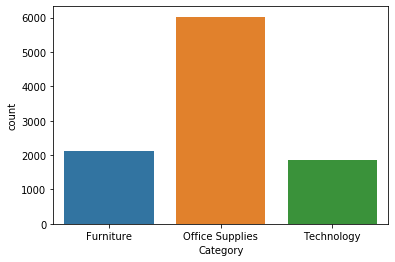

In [154]:
sns.countplot("Category",data=exp)

office supply category is large

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

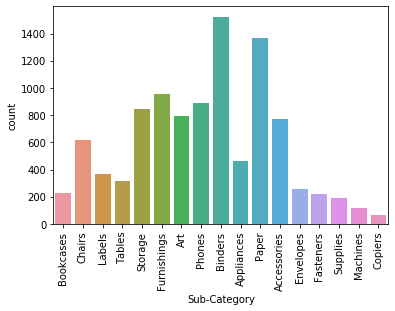

In [155]:
sns.countplot("Sub-Category",data=exp)
plt.xticks(rotation=90)

Binders and paper are mostly sell quantity

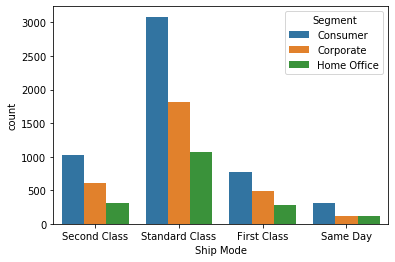

In [156]:
sns.countplot("Ship Mode",hue="Segment",data=exp)

Standard class people have Most number of consumer,corporate and home office

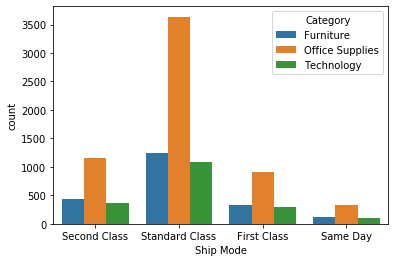

In [157]:
sns.countplot("Ship Mode",hue="Category",data=exp)

again standard class people buys most of the office supplies,furniture and Technology

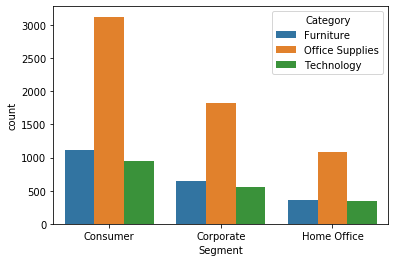

In [158]:
sns.countplot("Segment",hue="Category",data=exp)

Result are same type i.e. Consumer buys all of the three items most

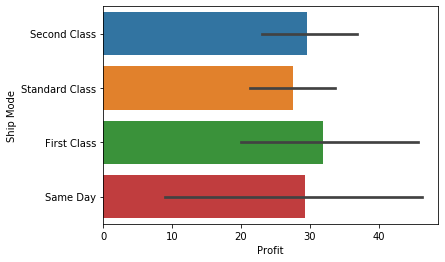

In [159]:
sns.barplot(x="Profit",y="Ship Mode",data=exp)

Most profitable class is first class

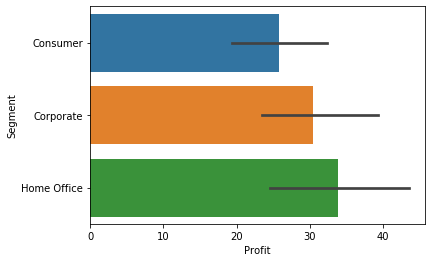

In [160]:
sns.barplot(x="Profit",y="Segment",data=exp)

Most profitable segment is Home office

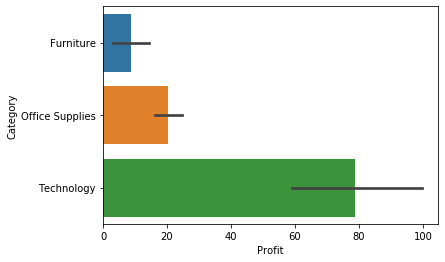

In [161]:
sns.barplot(x="Profit",y="Category",data=exp)

Most profitable category is Technology

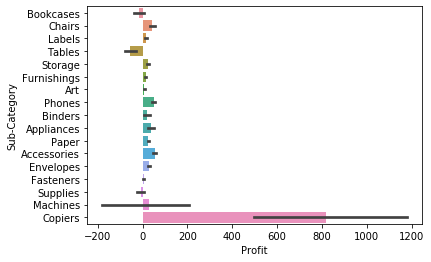

In [162]:
sns.barplot(x="Profit",y="Sub-Category",data=exp)

Most profitable sub-category is Copiers

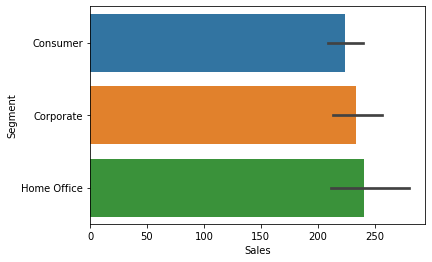

In [163]:
sns.barplot(x="Sales",y="Segment",data=exp)

All the three categories have equal number of Sales with Home Office as most

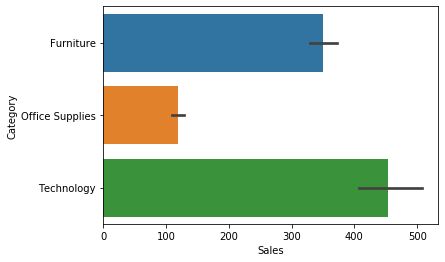

In [164]:
sns.barplot(x="Sales",y="Category",data=exp)

Technology has most number of sales

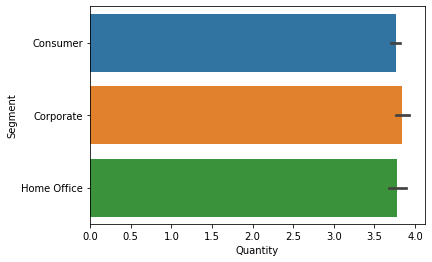

In [165]:
sns.barplot(x="Quantity",y="Segment",data=exp)

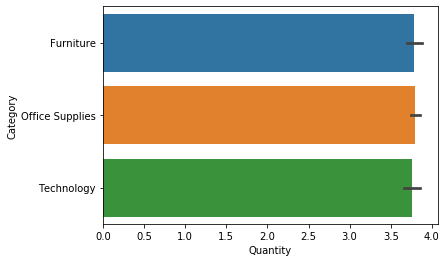

In [166]:
sns.barplot(x="Quantity",y="Category",data=exp)

Lets see how many features has outliers

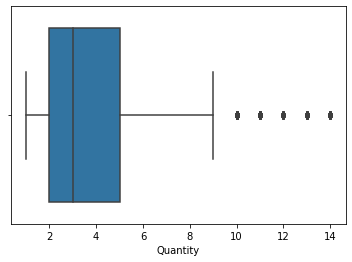

In [167]:
sns.boxplot("Quantity",data=exp)

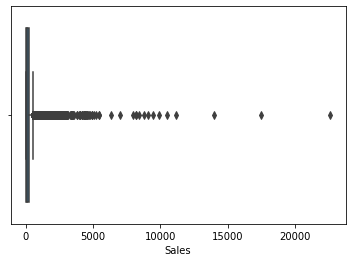

In [168]:
sns.boxplot("Sales",data=exp)

In [169]:
num

['Sales', 'Quantity', 'Discount', 'Profit']

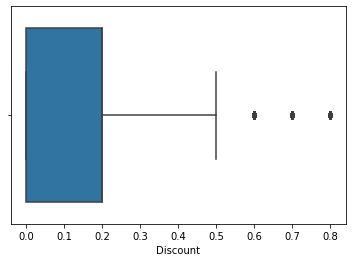

In [170]:
sns.boxplot("Discount",data=exp)

Lets see distibution of data in terms of kernel density and boxplot

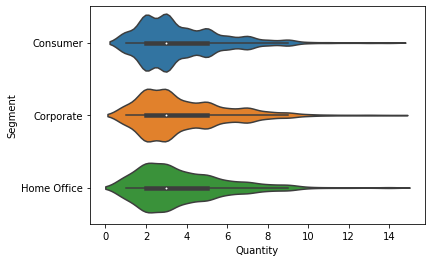

In [171]:
sns.violinplot(x="Quantity",y="Segment",data=exp)

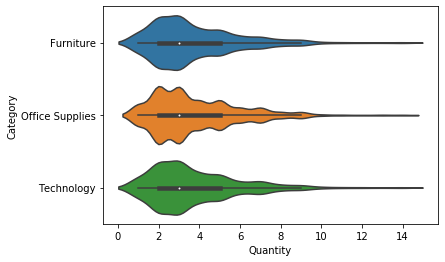

In [172]:
sns.violinplot(x="Quantity",y="Category",data=exp)

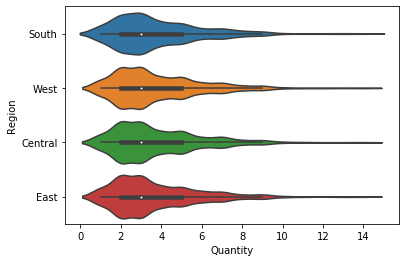

In [173]:
sns.violinplot(x="Quantity",y="Region",data=exp)

# Summary

Companies should try to increase their Sales inorder to get maximum profit,majority of sales are from california state and majority of peoples whether they are consumer,corporate and home office are from standard class

Most of the companies supply office goods,but most of the profit is in technology

Furniture and Technology sells most and homeoffice buys most of the stuff

Potential way to increase sale:

1)Discount Should be increase

2)Companies should try to shift to California,New York and Texas

3)Companies should try to sell most of their stuff to First Class People

4)Furniture company should try to increase their sale by selling more items to corporate and homeoffice at low cost(only)